# Create Single household load profile

Power converted to kW

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

current_folder = 'drive/My Drive/DAI-Labor/RL_VPP_Thesis/data/'

input_folder = current_folder + 'datasets/'
output_folder = current_folder + 'scenario_datasets/'

Mounted at /content/drive


In [ ]:
# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import math

In [ ]:
household_data = pd.read_csv(input_folder + 'consumer-00000002_glimpse_TEST.csv')

household_data['time'] = pd.to_datetime(household_data['time'])
#household_data['time'] = pd.to_datetime(household_data['time'], unit='ms')
household_data.head()
household_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14401 entries, 0 to 14400
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  14401 non-null  int64         
 1   time        14401 non-null  datetime64[ns]
 2   energy      14401 non-null  int64         
 3   power       14401 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 450.2 KB


In [ ]:
household_data.tail()

,Unnamed: 0,time,energy,power
14396,14397,2017-06-30 23:48:00,236442476624430,401459
14397,14398,2017-06-30 23:51:00,236442676097969,398947
14398,14399,2017-06-30 23:54:00,236442875509998,398824
14399,14400,2017-06-30 23:57:00,236443075531052,400042
14400,14401,2017-07-01 00:00:00,236443247614473,344167


In [ ]:
#household_data['time'].resample("D").agg(["sum", "count"])
#household_data.groupby(pd.TimeGrouper('15min'))[0].ohlc()

time_sampled = household_data.resample('15min', on='time').time.sum
household_data = household_data.resample('15min', on='time').agg({'time':'min','energy':'mean', 'power':'mean'})
#Convertion from mW to kW
household_data['power'] = household_data['power']/1000000
household_data['energy'] = household_data['energy']/1000000
household_data.head()
#print(time_sampled)

,time,energy,power
time,,,
2017-06-01 00:00:00,2017-06-01 00:00:00,2.323703e+08,0.403179
2017-06-01 00:15:00,2017-06-01 00:15:00,2.323713e+08,0.405153
2017-06-01 00:30:00,2017-06-01 00:30:00,2.323724e+08,0.537645
2017-06-01 00:45:00,2017-06-01 00:45:00,2.323742e+08,0.779943
2017-06-01 01:00:00,2017-06-01 01:00:00,2.323762e+08,0.732574


In [ ]:
# splitting dataframe by row index
#household_data = household_data.iloc[:1000,:]
#df_2 = df.iloc[1000:,:]
#print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))
household_data = household_data.drop(['energy'], axis=1)
household_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2881 entries, 2017-06-01 00:00:00 to 2017-07-01 00:00:00
Freq: 15T
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2881 non-null   datetime64[ns]
 1   power   2881 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 67.5 KB


In [ ]:
household_csv = household_data.to_csv(output_folder + 'generated_processed_datasets/household_load_test.csv', index = True)

In [ ]:
#household_data = household_data.iloc[:,:1]

household_data = household_data.drop(['time'], axis=1)
#df_2 = df.iloc[1000:,:]
#print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))
household_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2881 entries, 2017-06-01 00:00:00 to 2017-07-01 00:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   2881 non-null   float64
dtypes: float64(1)
memory usage: 45.0 KB


<AxesSubplot:xlabel='time'>

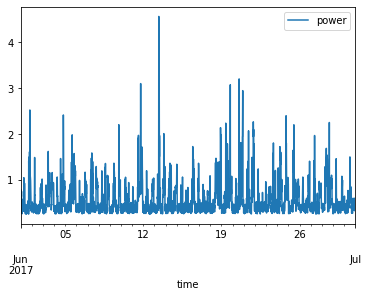

In [ ]:
household_data.plot()
#household_data.plot(legend=None)
#plt.show()